# Baseline
> Conv model

In [2]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [3]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'Quadro RTX 8000'

In [4]:
PATH = Path.cwd().parent/'data'
Path.BASE_PATH = PATH

IMAGE_PATH = PATH/'UCF-101-frames'
SPLIT_PATH = PATH/'ucfTrainTestlist'

In [5]:
files = get_sequence_paths(IMAGE_PATH)

## Params

In [6]:
seq_len = 20
image_size = 64
bs = 64

In [7]:
#slow
# val_idxs = get_split_idxs()
val_idxs = None

## Train

In [8]:
dls = get_action_dataloaders(files, bs=bs, image_size=image_size, seq_len=seq_len, 
                             val_idxs=val_idxs, random_sample=False)

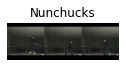

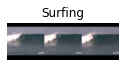

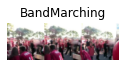

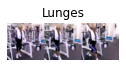

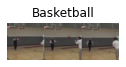

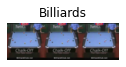

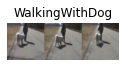

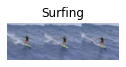

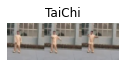

In [9]:
dls.show_batch()

In [10]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

In [11]:
learn = Learner(dls, model, metrics=[accuracy, top_k_accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

In [12]:
# learn.lr_find()

In [13]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.300936,1.865880,0.517643,0.805931,00:33
1,2.138071,2.393196,0.420045,0.745495,00:32
2,1.656261,1.614388,0.577327,0.846096,00:32
3,1.273189,1.330560,0.635886,0.892643,00:32
4,1.056863,0.980819,0.727102,0.930931,00:32
5,0.725485,0.792857,0.779279,0.953453,00:31
6,0.509138,0.559895,0.845345,0.970345,00:32
7,0.312132,0.417514,0.895646,0.975601,00:31
8,0.208488,0.376814,0.902402,0.977853,00:32
9,0.169014,0.360955,0.909910,0.980105,00:32


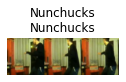

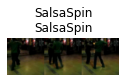

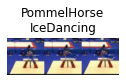

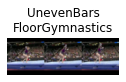

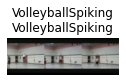

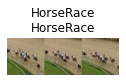

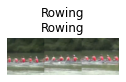

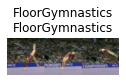

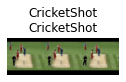

In [14]:
learn.show_results()